In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
def f(x):
    assert x.shape[0] == 2
    return x[0] + x[1]

def u_of_x(x, u_min, u_max, k=4, alpha=1):
    assert x.shape[0]==2, 'shape_error'
    assert u_min < u_max, f'input constraint error. {u_min} > {u_max}?'
    a = alpha
    m = 1
    l = 1
    g = 10.
    dt = 0.05
    gamma = pow(dt, -k)
    th, thd = x
    u_thres = np.roots([-(6*a*thd)/(m*l**2), -(2*th*thd*dt + 3*a*g/l*thd*np.sin(th) + gamma*(th**2+a*thd**2-1))])[0]
    if thd < 0:
        safe = 0 if u_thres > u_max else 1
    else:
        safe = 0 if u_thres < u_min else 1
    return safe

In [24]:
region = []
for _ in range(10000):
    x = np.random.randn(2,)
    if u_of_x(x, -10., 10., alpha=0.4) > 0:
        region.append(x)

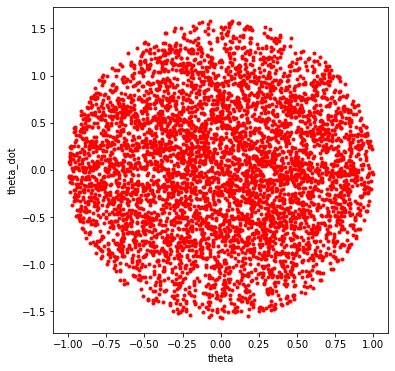

In [25]:
plt.figure(figsize=(6,6))
plt.xlabel('theta')
plt.ylabel('theta_dot')
plt.xlim(-1.6, 1.6)

for r in region:
    plt.scatter(r[0], r[1], color='red', marker='.')
plt.show()

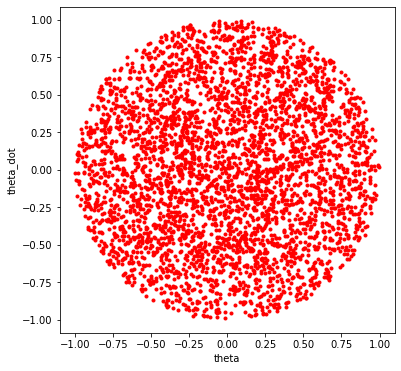

In [18]:
region = []
plt.figure(figsize=(6,6))
plt.xlabel('theta')
plt.ylabel('theta_dot')
for _ in range(10000):
    x = np.random.randn(2,)
    if u_of_x(x, -10., 10.) > 0:
        plt.scatter(x[0], x[1], color='red', marker='.')
        region.append(x)
plt.show()